In [1]:
import os
import numpy as np
import urllib.request
import tweepy as tw
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx



import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
consumer_key = 'DAgn9RUA95XG8JnF2ydmVfJTk'
consumer_secret = 'EnUToGTGDeqi9phcHRCMprKBheS0iQsYFzsKmratEzJNDX1ktq'
access_token = '3181144003-c0PSiV7uD717G0fNvPugiGBAYtICr5NNLKdk49Z'
access_token_secret = '0J63Vi6UNrI4wTBs1N1M5l5WUOEeZXfms8U3jwQEPkfQ5'


auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [39]:
# search_term = "sephora -filter:retweets"

# tweets = tw.Cursor(api.search,
#                    q=search_term,
#                    lang="en",
#                    since='2019-04-26',
#                    until = '2019-04-30').items(1000)

os.chdir("/Users/yanghong/Documents/Class/socialMediaMining/")

tweets1 = open("tweetOld.txt", "r")

tweets = tweets1.readlines()

all_tweets = [tweet for tweet in tweets]

In [40]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()

# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]

# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

print(counts_no_urls.most_common(300))

#stop words
stop = []
newStop = set(list(stop) +['stocks'] +['.'] +['to'] +['you'] +['the'] +['i'] +['a'] +['my'] +['so'] +['is'] +['im'] +['if'] +['she'] +['was'] +['at'] +['of'] +['her'] +['and'] +['for'] +['in'] +['it'] +['on'] +['this'] +['me'] +['with'] +['that'] +['we'] +['from'])
print(newStop)


sentence = all_words_no_urls

all_words_no_urls_no_stopword = [i for i in sentence if i not in newStop]

print(all_words_no_urls_no_stopword)

counts_no_urls_no_stopword = collections.Counter(all_words_no_urls_no_stopword)
print(counts_no_urls_no_stopword.most_common(300))

[('sephora', 4212), ('i', 2546), ('the', 2053), ('to', 1911), ('and', 1443), ('a', 1417), ('my', 1093), ('for', 903), ('at', 819), ('you', 816), ('is', 794), ('in', 757), ('of', 705), ('sale', 665), ('on', 655), ('it', 641), ('me', 638), ('this', 627), ('so', 530), ('im', 528), ('that', 464), ('just', 407), ('from', 376), ('with', 372), ('but', 372), ('have', 366), ('get', 358), ('your', 349), ('out', 343), ('makeup', 305), ('like', 304), ('all', 296), ('was', 292), ('its', 291), ('are', 272), ('rouge', 265), ('can', 263), ('what', 255), ('be', 252), ('go', 251), ('got', 248), ('off', 245), ('vib', 243), ('up', 242), ('need', 237), ('not', 236), ('if', 230), ('now', 224), ('beauty', 223), ('when', 220), ('they', 215), ('20', 212), ('new', 207), ('we', 206), ('do', 192), ('today', 192), ('about', 190), ('time', 187), ('or', 184), ('dont', 184), ('spring', 168), ('buy', 167), ('card', 165), ('has', 163), ('know', 163), ('amp', 161), ('good', 160), ('check', 159), ('one', 152), ('will', 1

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanghong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
stop_words = set(stopwords.words('english'))
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

In [43]:
print(tweets_nsw[0])

['roddy', 'rich', 'said', 'gave', '10', 'bands', 'blow', 'sephora', 'couldnt', 'relate']


In [44]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(300)
words300 = []
for tup in counts_nsw.most_common(300):
    words300.append(tup[0])
print (words300)

['sephora', 'sale', 'im', 'get', 'makeup', 'like', 'rouge', 'go', 'got', 'vib', 'need', 'beauty', '20', 'new', 'today', 'time', 'dont', 'spring', 'buy', 'card', 'know', 'amp', 'good', 'check', 'one', 'love', 'please', 'ulta', 'gift', 'going', 'sephoras', 'order', 'ive', 'went', 'really', 'products', 'want', 'store', 'day', 'money', 'skin', 'cant', 'use', 'foundation', 'items', 'skincare', 'online', 'fentybeauty', 'norvina1', 'see', 'us', 'make', 'look', 'shop', 'win', 'insider', 'shopping', 'thank', 'much', 'back', 'face', 'members', 'would', 'also', 'collection', 'girl', 'free', 'first', 'bought', 'getting', 'try', 'ultabeauty', 'send', 'right', 'spent', 'even', 'best', 'lol', 'still', 'things', 'think', 'points', 'bonus', 'work', 'spend', 'take', 'urbandecay', 'share', 'stuff', 'brand', '2019', 'youre', 'bag', 'sorry', '2', 'cart', 'thanks', 'already', 'yall', 'loving', 'rihanna', 'palette', 'never', 'moschino', 'everything', 'wait', 'poshmark', 'fashion', 'u', 'help', 'thats', '3', 

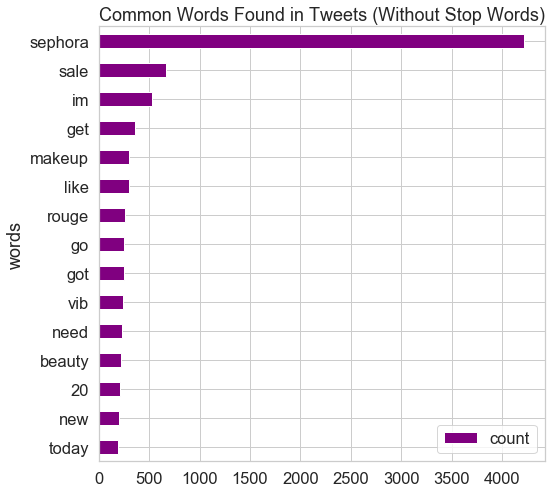

In [45]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [46]:
collection_words = ['sephora']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('sale', 665),
 ('im', 528),
 ('get', 358),
 ('makeup', 305),
 ('like', 304),
 ('rouge', 265),
 ('go', 251),
 ('got', 248),
 ('vib', 243),
 ('need', 237),
 ('beauty', 223),
 ('20', 212),
 ('new', 207),
 ('today', 192),
 ('time', 187)]

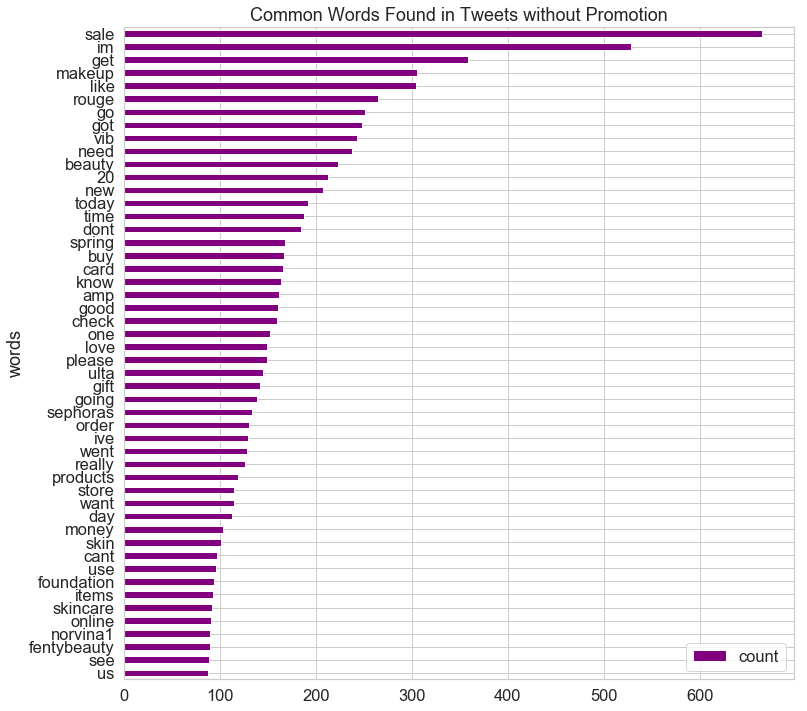

In [47]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(50),
                             columns=['words', 'count'])


fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")


ax.set_title("Common Words Found in Tweets without Promotion")

plt.show()

In [48]:
clean_tweets_ncw.head(20)

,words,count
0,sale,665
1,im,528
2,get,358
3,makeup,305
4,like,304
5,rouge,265
6,go,251
7,got,248
8,vib,243
9,need,237


In [49]:
clean_tweets_ncw.iloc[:,1]/5900

0     0.112712
1     0.089492
2     0.060678
3     0.051695
4     0.051525
5     0.044915
6     0.042542
7     0.042034
8     0.041186
9     0.040169
10    0.037797
11    0.035932
12    0.035085
13    0.032542
14    0.031695
15    0.031186
16    0.028475
17    0.028305
18    0.027966
19    0.027627
20    0.027288
21    0.027119
22    0.026949
23    0.025763
24    0.025254
25    0.025254
26    0.024576
27    0.023898
28    0.023390
29    0.022542
30    0.022034
31    0.021864
32    0.021695
33    0.021356
34    0.020169
35    0.019322
36    0.019322
37    0.018983
38    0.017458
39    0.017119
40    0.016441
41    0.016271
42    0.015932
43    0.015593
44    0.015424
45    0.015254
46    0.015085
47    0.015085
48    0.014915
49    0.014746
Name: count, dtype: float64

In [51]:
clean_tweets_ncw['mean'] = clean_tweets_ncw.iloc[:,1]/5900

In [52]:
clean_tweets_ncw.head(50)

,words,count,mean
0,sale,665,0.112712
1,im,528,0.089492
2,get,358,0.060678
3,makeup,305,0.051695
4,like,304,0.051525
5,rouge,265,0.044915
6,go,251,0.042542
7,got,248,0.042034
8,vib,243,0.041186
9,need,237,0.040169


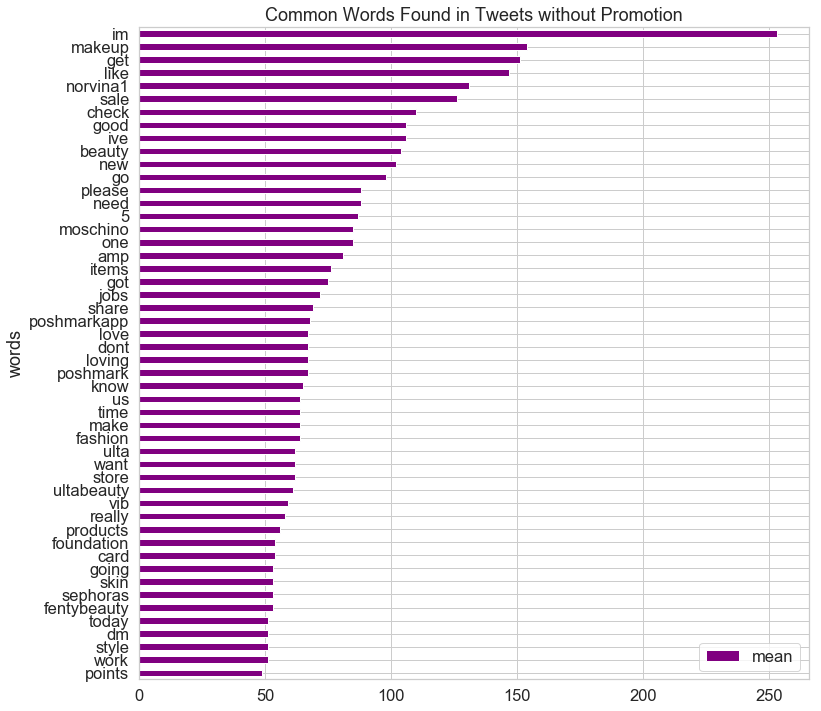

In [38]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(50),
                             columns=['words','mean'])


fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='mean').plot.barh(x='words',
                      y='mean',
                      ax=ax,
                      color="purple")


ax.set_title("Common Words Found in Tweets without Promotion")

plt.show()